# Overfitting

In [1]:
from sklearn.datasets import load_iris

from sklearn.tree import (
    DecisionTreeClassifier,
    DecisionTreeRegressor,
    plot_tree
)

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from mlxtend import plotting # https://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/


def decision_regions(data, target, classifier, figsize=(12, 8)):
    plt.figure(figsize=figsize)
    plotting.plot_decision_regions(X=data, y=target, clf=classifier, legend=2)
    plt.scatter(data[:, 0], data[:, 1], c=["brg"[x] for x in target])

In [2]:
iris = load_iris()
X = iris.data[:,2:]
y = iris.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [4]:
print("Accuracy on training set: {:.2f}".format(tree_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(tree_clf.score(X_test, y_test)))

Accuracy on training set: 0.99
Accuracy on test set: 0.95


Przeuczenie nie jest pojeciem 0-1. Zasadniczo jeśli dokładność jest niższa na teście oznacza, że model traci możliwość generalizacji. Jeśli pracujemy z błędem (np.MSE) to z kolei na teście w tym wariancie błąd będzie rósł. 

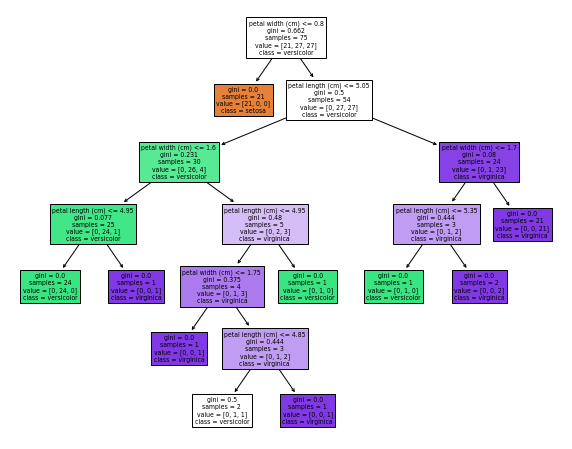

In [5]:
plt.figure(figsize = (10, 8))

plot_tree(tree_clf,
          feature_names = iris.feature_names[2:],
          class_names = iris.target_names,
          filled=True);

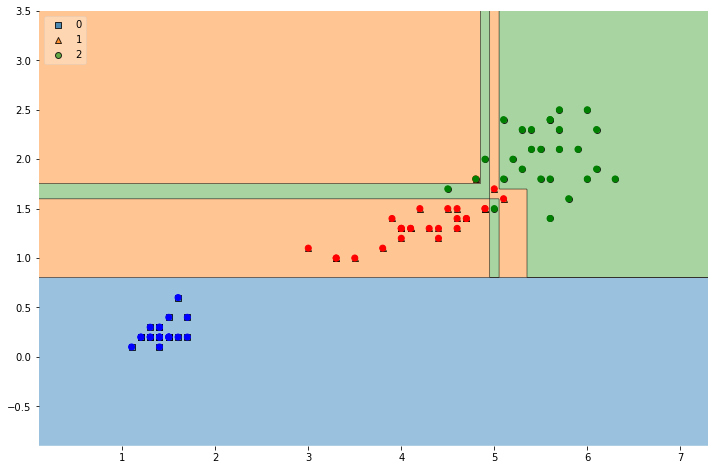

In [ ]:
decision_regions(X_train, y_train, tree_clf)

## Pruning (przycinanie drzewa)

In [6]:
tree_clf2 = DecisionTreeClassifier(max_depth=3, random_state=0)
tree_clf2.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(tree_clf2.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(tree_clf2.score(X_test, y_test)))

Accuracy on training set: 0.95
Accuracy on test set: 1.00


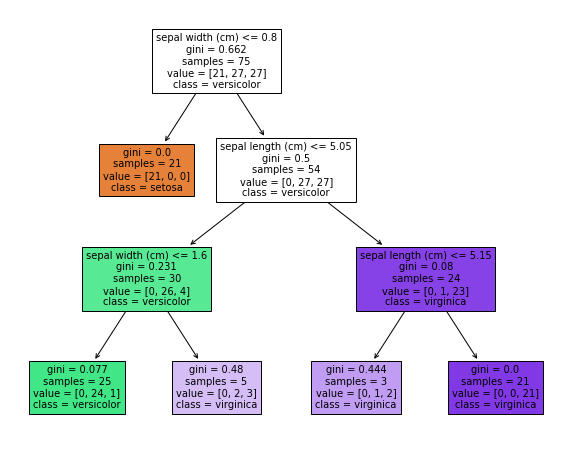

In [7]:
plt.figure(figsize = (10, 8))

plot_tree(tree_clf2,
          feature_names = iris.feature_names,
          class_names = iris.target_names,
          filled=True);

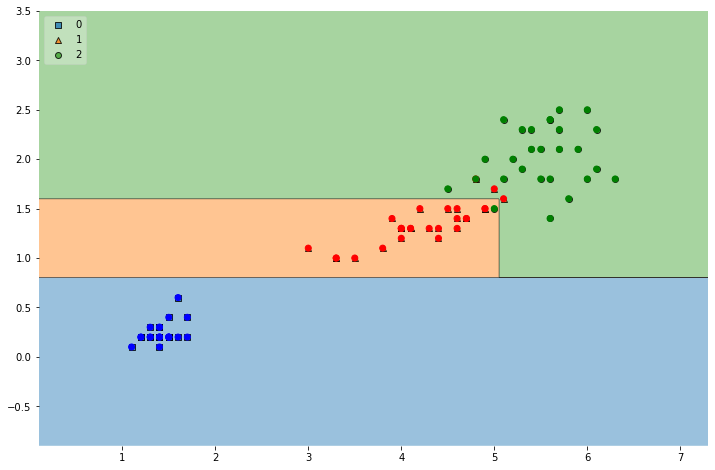

In [ ]:
decision_regions(X_train, y_train, tree_clf2)

In [14]:
y_pred = tree_clf2.predict(X_test)

In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        23

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



# Zadania do przećwiczenia

Wczytaj zbiór `load_breast_cancer` dostępny w `sklearn.datasets`- UWAGA! w tym przypadku nie da się juz zwizualizować za pomocą `decision_regions`  
Podziel zbiór na treningowy i testowy w proporcjach 7:3.  
Wytrenuj model DecisionTreeClassifier bez przycinania.  
Sprawdź accuracy na zbiorze treningowym i testowym.  
Narysuj drzewo.  
Manipuluj parametrami (max_depth, min_samples_split, min_weight_fraction_leaf, max_leaf_nodes, max_features) by sprawdzić jak zachowują się wyniki.   
Narysuj wykres zależności wielkości wybranego parametru od wyników accuracy.  
Sprawdz istotność zmiennych dla najlepszego modelu.